In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.hub.load('WongKinYiu/yolov7', 'custom', 'models/best.pt',
                        force_reload=True, trust_repo=True)

Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /Users/daviddecoding/.cache/torch/hub/main.zip

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1    

 75                -1  1     65792  models.common.Conv                      [512, 128, 1, 1]              
 76                -1  1         0  models.common.MP                        []                            
 77                -1  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 78                -3  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 79                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 80      [-1, -3, 63]  1         0  models.common.Concat                    [1]                           
 81                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 82                -2  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 83                -1  1    295168  models.common.Conv                      [256, 128, 3, 1]              
 84                -1  1    147712  m

Adding autoShape... 


In [3]:
result = model('data/images/not_sitting.2ae4ef23-f24e-45b2-90a0-02bc4e7e3ee8.jpg')
result.print()

FileNotFoundError: [Errno 2] No such file or directory: 'data/images/not_sitting.2ae4ef23-f24e-45b2-90a0-02bc4e7e3ee8.jpg'

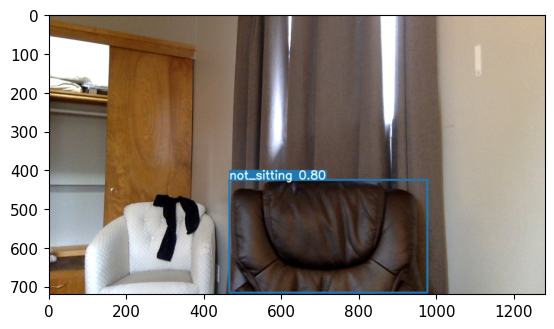

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [6]:
result = model('data/images/sitting.0f14fd1b-a394-4253-800a-f63f336c6195.jpg')
result.print()

image 1/1: 720x1280 1 sitting
Speed: 18.3ms pre-process, 599.3ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


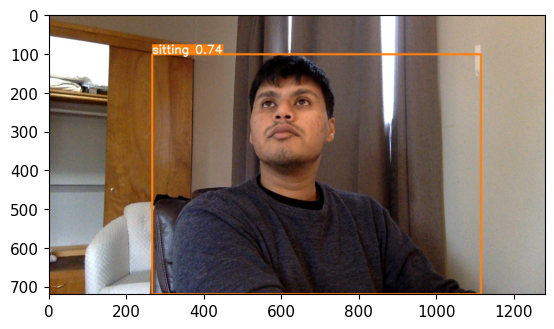

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [8]:
import cv2 as cv

cap = cv.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    result = model(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    cv.imshow('Capture', cv.cvtColor(np.squeeze(result.render()), cv.COLOR_RGB2BGR))
    
    if cv.waitKey(10) & 0XFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

2023-02-22 16:54:22.563 Python[7749:3540107] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/8k/tv3j8ck95x74d_clz0xb82hh0000gn/T/org.python.python.savedState


KeyboardInterrupt: 

In [22]:
import cv2 as cv
import requests
import time
import sys

URL = ""
user_id = 123
prev_sitting = False

headers = {"Content-Type": "application/json; charset=utf-8"}

cap = cv.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    result = model(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
    not_sitting_label_present = False
    if len(result.pred) > 0 and len(result.pred[0]):
        for i in range(len(result.pred[0])):
            if result.pred[0][i][-1] == 0:
                not_sitting_label_present = True
    
    now_sitting = not not_sitting_label_present
    
    if now_sitting != prev_sitting:
        prev_sitting = now_sitting
        
        if now_sitting:
            print("You are sitting!")
        else:
            print("You are no longer sitting!")

#         response = requests.post(f'{URL}/{user_id}', headers=headers, json = { 'is_sitting': now_sitting })
        
#         if str(response.text) != '"Success"':
#             sys.exit("Request to backend failed")
    time.sleep(1)


cap.release()
cv.destroyAllWindows()

You are sitting!


KeyboardInterrupt: 